### DHRUV DARDA

DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION

dataset:https://bit.ly/3i4rbWl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import streamlit as st

%matplotlib inline

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [5]:
df.drop(['Country', 'Postal Code'], axis = 1, inplace=True)
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


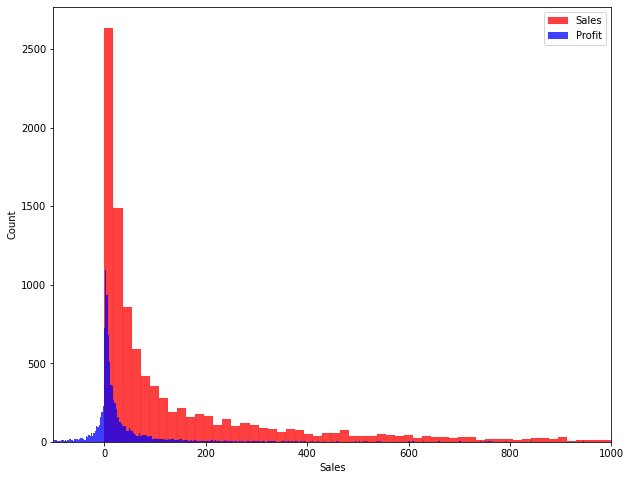

In [6]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x='Sales',color='red',label='Sales')
sns.histplot(data = df, x='Profit',color='Blue',label='Profit')
plt.xlim([-100,1000])
plt.legend()
plt.show()

In [7]:
Profit = df[df.Profit>0]
Loss = df[df.Profit<0]
#Loss

In [8]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [9]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

<AxesSubplot:>

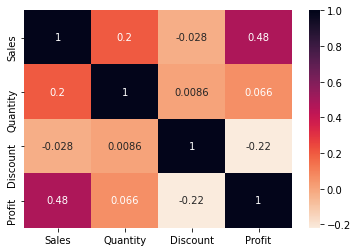

In [10]:
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

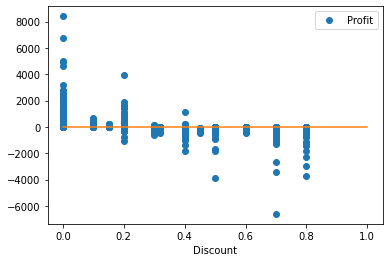

In [11]:
df.plot(x='Discount', y='Profit', style='o')
plt.plot(np.zeros(2))
plt.show()

It is visible from the above graph and the correlation matrix, that as the Discount increases, the profits go down which is even more visible if the Discounts are above 0.5

In [12]:
grouped = df.groupby(['Category', 'Ship Mode']).mean()
grouped

Sales  Quantity  Discount     Profit
Category        Ship Mode                                                
Furniture       First Class     338.625452  3.785933  0.180031   9.379044
                Same Day        328.981336  3.806723  0.186134   6.700407
                Second Class    366.016451  3.674473  0.172482   9.897568
                Standard Class  349.223933  3.820513  0.171651   8.301855
Office Supplies First Class     111.354186  3.705495  0.169231  20.220142
                Same Day         89.234604  3.518405  0.143558  19.704047
                Second Class    139.481773  3.888889  0.129167  23.496673
                Standard Class  117.630907  3.822705  0.164431  19.405933
Technology      First Class     463.008608  3.598007  0.133887  91.370643
                Same Day        613.508827  3.673469  0.140816  88.478483
                Second Class    388.583448  3.754098  0.130328  71.454116
                Standard Class  456.971382  3.809612  0.131793  76.829286

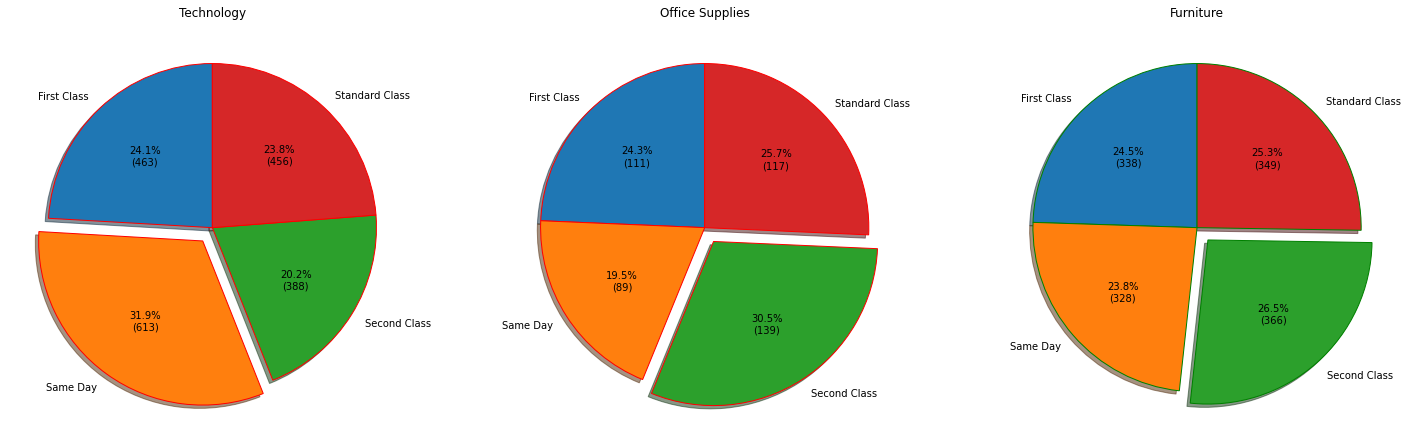

In [13]:
fig = plt.figure(figsize=(25,110))
ax1 = plt.subplot(1,3,1)
T = grouped.loc['Technology']
labels = ['First Class', 'Same Day', 'Second Class', 'Standard Class']

wp = { 'linewidth' : 1, 'edgecolor' : "red" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

ax1.pie(T['Sales'], explode=(0,0.1,0,0), labels= labels, shadow = True, autopct = lambda pct: func(pct, T['Sales']), startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
ax1.set_title('Technology')

ax2 = plt.subplot(1,3,2)
OS = grouped.loc['Office Supplies']
labels = ['First Class', 'Same Day', 'Second Class', 'Standard Class']

wp = { 'linewidth' : 1, 'edgecolor' : "red" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

ax2.pie(OS['Sales'], explode=(0,0,0.1,0), labels= labels, shadow = True, autopct = lambda pct: func(pct, OS['Sales']), startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
ax2.set_title('Office Supplies')

ax3 = plt.subplot(1,3,3)
F = grouped.loc['Furniture']
labels = ['First Class', 'Same Day', 'Second Class', 'Standard Class']

wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

ax3.pie(F['Sales'], explode=(0,0,0.1,0), labels= labels, shadow = True, autopct = lambda pct: func(pct, F['Sales']), startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
ax3.set_title('Furniture')

#plt.legend(labels, loc ="lower right")
plt.show()

In [14]:
grouped = df.groupby(['Category', 'Segment']).mean()
grouped

Sales  Quantity  Discount     Profit
Category        Segment                                               
Furniture       Consumer     351.347091  3.743037  0.176739   6.281293
                Corporate    354.519792  3.862229  0.174071  11.741201
                Home Office  336.825131  3.776243  0.165000  10.705465
Office Supplies Consumer     116.390194  3.760154  0.158746  18.014174
                Corporate    126.745309  3.856044  0.160604  22.102923
                Home Office  115.309021  3.827618  0.147451  24.034439
Technology      Consumer     427.339534  3.782334  0.134385  74.445646
                Corporate    444.855810  3.781588  0.131949  79.723823
                Home Office  535.976658  3.646199  0.127193  89.152458

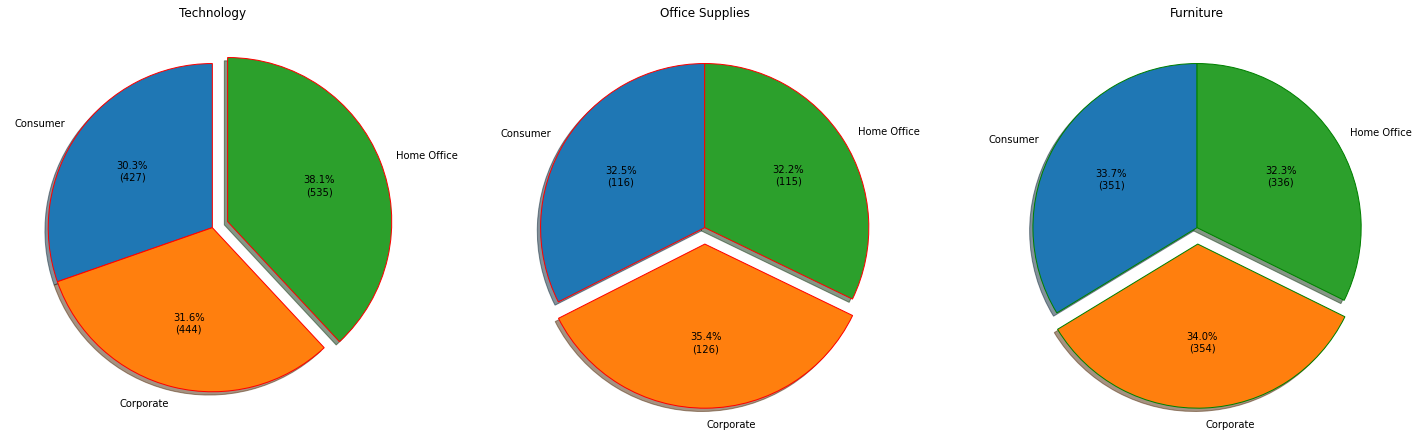

In [15]:
fig = plt.figure(figsize=(25,110))
ax1 = plt.subplot(1,3,1)
T = grouped.loc['Technology']
labels = ['Consumer', 'Corporate', 'Home Office']

wp = { 'linewidth' : 1, 'edgecolor' : "red" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

ax1.pie(T['Sales'], explode=(0,0,0.1), labels= labels, shadow = True, autopct = lambda pct: func(pct, T['Sales']), startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
ax1.set_title('Technology')

ax2 = plt.subplot(1,3,2)
OS = grouped.loc['Office Supplies']

wp = { 'linewidth' : 1, 'edgecolor' : "red" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

ax2.pie(OS['Sales'], explode=(0,0.1,0), labels= labels, shadow = True, autopct = lambda pct: func(pct, OS['Sales']), startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
ax2.set_title('Office Supplies')

ax3 = plt.subplot(1,3,3)
F = grouped.loc['Furniture']

wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

ax3.pie(F['Sales'], explode=(0,0.1,0), labels= labels, shadow = True, autopct = lambda pct: func(pct, F['Sales']), startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
ax3.set_title('Furniture')

#plt.legend(labels, loc ="lower right")
plt.show()

In [16]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [17]:
df.groupby(['Category', 'Sub-Category']).mean()

Sales  Quantity  Discount      Profit
Category        Sub-Category                                             
Furniture       Bookcases      503.859633  3.807018  0.211140  -15.230509
                Chairs         532.332420  3.818476  0.170178   43.095894
                Furnishings     95.825668  3.723093  0.138349   13.645918
                Tables         648.794771  3.890282  0.261285  -55.565771
Office Supplies Appliances     230.755710  3.710300  0.166524   38.922758
                Art             34.068834  3.768844  0.074874    8.200737
                Binders        133.560560  3.922521  0.372292   19.843574
                Envelopes       64.867724  3.566929  0.080315   27.418019
                Fasteners       13.936774  4.211982  0.082028    4.375660
                Labels          34.303055  3.846154  0.068681   15.236962
                Paper           57.284092  3.779562  0.074891   24.856620
                Storage        264.590553  3.732861  0.074704   25.152277
                Supplies       245.650200  3.405263  0.076842   -6.258418
Technology      Accessories    215.974604  3.840000  0.078452   54.111788
                Copiers       2198.941618  3.441176  0.161765  817.909190
                Machines      1645.553313  3.826087  0.306087   29.432669
                Phones         371.211534  3.699663  0.154556   50.073938